In [1]:
import awkward as ak
import numpy as np
import coffea
import uproot
import hist
import vector
from coffea import util, processor
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema, BaseSchema
from collections import defaultdict
import pickle
from distributed.diagnostics.plugin import UploadDirectory
import os
import matplotlib.pyplot as plt
from smp_utils import *

In [2]:
constants = util_constants()

In [3]:
with open("qjetmass_zjets_reco.pkl", "rb") as f:
    output_reco = pickle.load( f )

In [4]:
with open("qjetmass_zjets_gen.pkl", "rb") as f:
    output_gen = pickle.load( f )

In [5]:
datasets_reco = list( output_reco["cutflow"].keys() )
histnames_reco = output_reco.keys()

In [6]:
datasets_gen = list( output_gen["cutflow"].keys() )
histnames_gen = output_gen.keys()

In [7]:
#output_reco["cutflow"]

In [8]:
#output_gen["cutflow"]

In [9]:
print(histnames_reco)
print("========")
print(histnames_gen)

dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])
dict_keys(['njet_gen', 'njet_reco', 'ptjet_gen_pre', 'ptjet_mjet_u_gen', 'ptjet_mjet_u_reco', 'ptjet_mjet_g_gen', 'ptjet_mjet_g_reco', 'ptjet_reco_over_gen', 'drjet_reco_gen', 'mz_gen', 'mz_reco', 'mz_reco_over_gen', 'dr_z_jet_gen', 'dr_z_jet_reco', 'dphi_z_jet_gen', 'dphi_z_jet_reco', 'ptasym_z_jet_gen', 'ptasym_z_jet_reco', 'm_u_jet_reco_over_gen', 'm_g_jet_reco_over_gen', 'dr_gen_subjet', 'response_matrix_u', 'response_matrix_g', 'cutflow'])


In [10]:
for ihist,ihistname in enumerate(histnames_gen):
    if ihistname == "cutflow" or "response" in ihistname : continue
    #print(ihist)
    #print(ihistname)
    for i,dataset in enumerate(datasets_gen) :
        #print(i)
        #print(dataset)
        if np.sum(output_gen[ihistname].values(flow=True)) > 0:
            output_gen[ihistname].view(flow=True)[i] /= output_gen["cutflow"][dataset]['all events'] * constants.lumi[dataset] * constants.z_xs

## Plotting

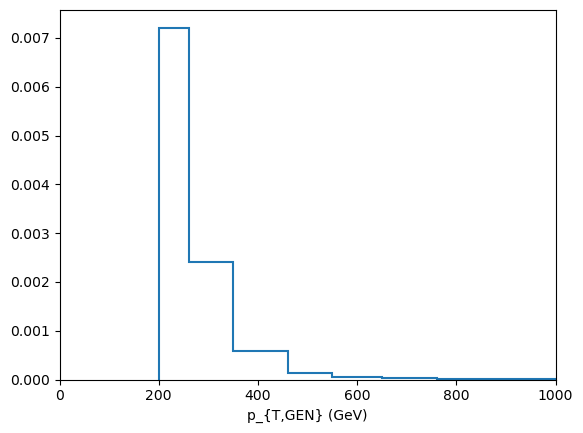

In [11]:
#Ungroomed comparison plot (generated data)
output_gen['ptjet_mjet_u_gen'].project("ptgen").plot(density=True)
plt.xlabel("p_{T,GEN} (GeV)")
plt.xlim(0,1000)
plt.show()

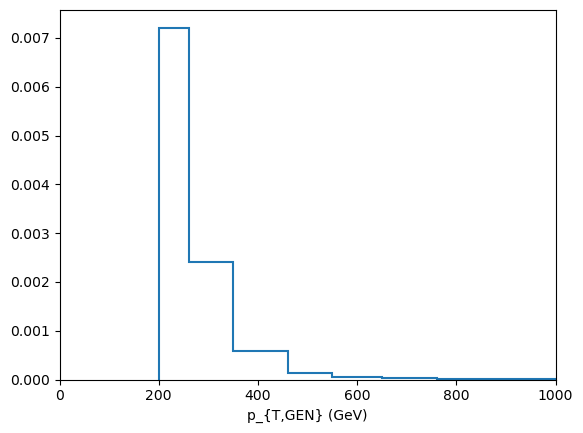

In [12]:
#Groomed comparison plot (generated data)
output_gen['ptjet_mjet_g_gen'].project("ptgen").plot(density=True)
plt.xlabel("p_{T,GEN} (GeV)")
plt.xlim(0,1000)
plt.show()

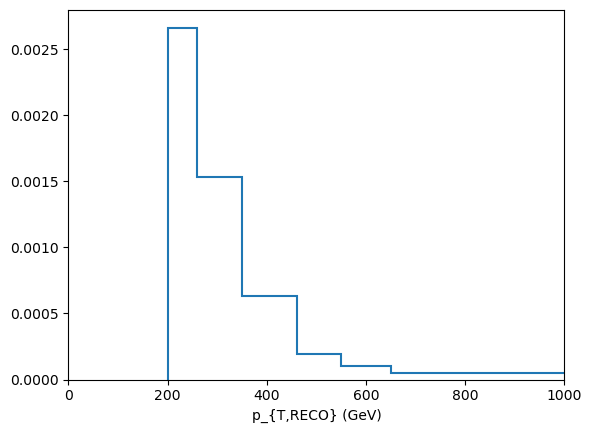

In [13]:
#Ungroomed reconstructed data to be unfolded
output_reco["ptjet_mjet_u_reco"].project("ptreco").plot(density=True)
plt.xlim(0,1000)
plt.show()

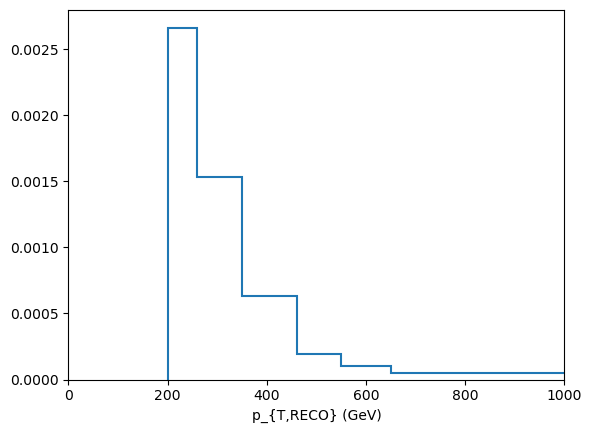

In [14]:
#Groomed reconstructed data to be unfolded
output_reco["ptjet_mjet_g_reco"].project("ptreco").plot(density=True)
plt.xlim(0,1000)
plt.show()

## Gaussian plots

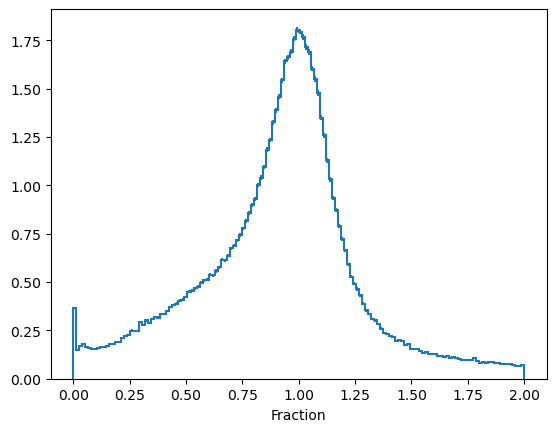

In [15]:
#Groomed gen data
output_gen['m_g_jet_reco_over_gen'].project("frac").plot(density=True)
plt.show()

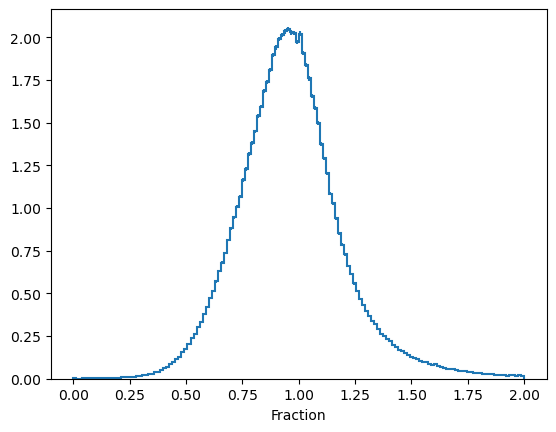

In [16]:
#Ungroomed gen data
output_gen['m_u_jet_reco_over_gen'].project("frac").plot(density=True)
plt.show()

/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:263: RuntimeWarning: divide by zero encountered in double_scalars
  self.flat_scale(1 / np.sum(np.diff(self.edges) * self.values))
/opt/conda/lib/python3.8/site-packages/mplhep/error_estimation.py:38: RuntimeWarning: All sumw are zero!  Cannot compute meaningful error bars
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:243: RuntimeWarning: invalid value encountered in multiply
  self.values *= scale
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:244: RuntimeWarning: invalid value encountered in multiply
  self.yerr_lo *= scale
/opt/conda/lib/python3.8/site-packages/mplhep/utils.py:245: RuntimeWarning: invalid value encountered in multiply
  self.yerr_hi *= scale
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1185: RuntimeWarning: All-NaN axis encountered
  miny = np.nanmin(masked_verts[..., 1])
/opt/conda/lib/python3.8/site-packages/matplotlib/axes/_axes.py:1186: RuntimeWarning: All

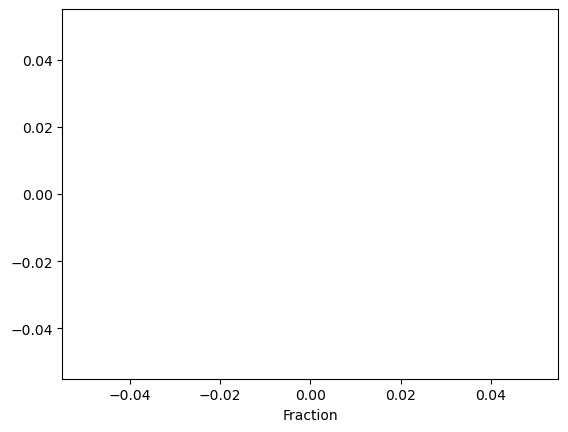

In [17]:
#Groomed reconstructed data
output_reco['m_g_jet_reco_over_gen'].project("frac").plot(density=True)
plt.show()

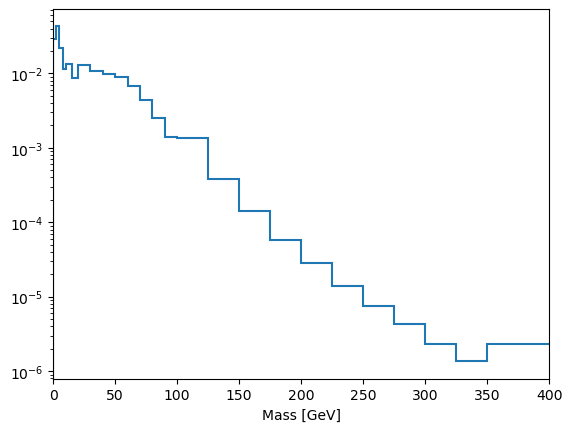

In [18]:
output_gen['ptjet_mjet_g_gen'].project("mgen").plot(density=True)
plt.yscale("log")
plt.xlim(0,400)
plt.show()